In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
df = pd.read_csv('steam_games.csv')
df = df.dropna()
df = df.drop_duplicates()


In [41]:
df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
6,https://store.steampowered.com/app/601150/Devi...,app,Devil May Cry 5,"The ultimate Devil Hunter is back in style, in...","Very Positive,(408),- 87% of the 408 user revi...","Very Positive,(9,645),- 92% of the 9,645 user ...","Mar 7, 2019","CAPCOM Co., Ltd.","CAPCOM Co., Ltd.,CAPCOM Co., Ltd.","Action,Hack and Slash,Great Soundtrack,Demons,...","Single-player,Online Multi-Player,Online Co-op...","English,French,Italian,German,Spanish - Spain,...",51.0,Action,About This Game The Devil you know returns in...,Mature Content Description The developers de...,"Minimum:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT Requi...","Recommended:,OS:,WINDOWS® 7, 8.1, 10 (64-BIT R...",$59.99,$70.42
37,https://store.steampowered.com/app/532210/Life...,app,Life is Strange 2,"After a tragic incident, brothers Sean and Dan...","Mostly Positive,(155),- 72% of the 155 user re...","Very Positive,(4,437),*,- 86% of the 4,437 use...","Sep 26, 2018",DONTNOD Entertainment,"Square Enix,Square Enix","Choices Matter,Story Rich,Adventure,Great Soun...","Single-player,Steam Achievements,Full controll...","English,French,Italian,German,Spanish - Spain,...",46.0,Adventure,About This Game Purchase the Complete Season...,Mature Content Description The developers de...,"Minimum:,OS:,Windows 7 or above (64-bit Operat...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$7.99,$39.95
75,https://store.steampowered.com/app/476600/Call...,app,Call of Duty®: WWII,Call of Duty® returns to its roots with Call o...,"Mixed,(66),- 53% of the 66 user reviews in the...","Mixed,(12,703),- 54% of the 12,703 user review...","Nov 2, 2017","Sledgehammer Games,Raven Software","Activision,Activision","World War II,FPS,Multiplayer,War,Action,Zombie...","Single-player,Multi-player,Online Multi-Player...","English,French,Italian,German,Spanish - Spain,...",35.0,Action,About This Game Includes Digital Edition Bon...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",1.020,$906.48
94,https://store.steampowered.com/app/418240/Shad...,app,Shadow Tactics: Blades of the Shogun,Shadow Tactics is a hardcore tactical stealth ...,"Very Positive,(124),- 94% of the 124 user revi...","Overwhelmingly Positive,(7,238),- 95% of the 7...","Dec 6, 2016",Mimimi Productions,"Daedalic Entertainment,Daedalic Entertainment","Stealth,Tactical,Ninja,Strategy,Real Time Tact...","Single-player,Steam Achievements,Full controll...","English,French,German,Spanish - Spain,Japanese...",44.0,"Indie,Strategy",About This Game Shadow Tactics is a hardcore...,Mature Content Description The developers de...,"Minimum:,OS:,Windows Vista 64-bit,Processor:,I...","Recommended:,OS:,Windows 7 64-bit or higher, W...",$39.99,$13.59
153,https://store.steampowered.com/app/513710/SCUM/,app,SCUM,SCUM aims to evolve the multiplayer open world...,"Mixed,(346),- 58% of the 346 user reviews in t...","Mixed,(22,177),- 64% of the 22,177 user review...","Aug 29, 2018","Gamepires,Croteam","Devolver Digital,Devolver Digital","Early Access,Survival,Open World,Multiplayer,Z...","Single-player,Multi-player,Online Multi-Player...","English,German,Russian,Simplified Chinese,Fren...",56.0,"Action,Adventure,Indie,Massively Multiplayer,E...",About This Game The world’s unquenchable need...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$19.99,$28.48


In [42]:
df['recent_reviews'].fillna('No Reviews', inplace=True)
df['all_reviews'].fillna('No Reviews', inplace=True)
df['original_price'].fillna(0, inplace=True)
df['discount_price'].fillna(0, inplace=True)

In [43]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['original_price'] = pd.to_numeric(df['original_price'], errors='coerce')
df['discount_price'] = pd.to_numeric(df['discount_price'], errors='coerce')

In [44]:
df['recent_sentiment'] = df['recent_reviews'].str.extract(r'(\w+)')
df['all_sentiment'] = df['all_reviews'].str.extract(r'(\w+)')

In [45]:
top_rated = df[df['all_sentiment'].str.contains('Positive|Overwhelmingly Positive', case=False, na=False)]
top_rated = top_rated.sort_values(by='all_sentiment', ascending=False).head(10)
print(top_rated[['name', 'all_sentiment']])

Empty DataFrame
Columns: [name, all_sentiment]
Index: []


In [46]:
from collections import Counter

# Split and count popular tags
tags = df['popular_tags'].str.split(',').explode()
tag_counts = Counter(tags)
print("Most Popular Tags:", tag_counts.most_common(10))

Most Popular Tags: [('Singleplayer', 65), ('Action', 63), ('Adventure', 58), ('Atmospheric', 49), ('Indie', 46), ('Violent', 43), ('Gore', 39), ('Story Rich', 39), ('Multiplayer', 36), ('Great Soundtrack', 34)]


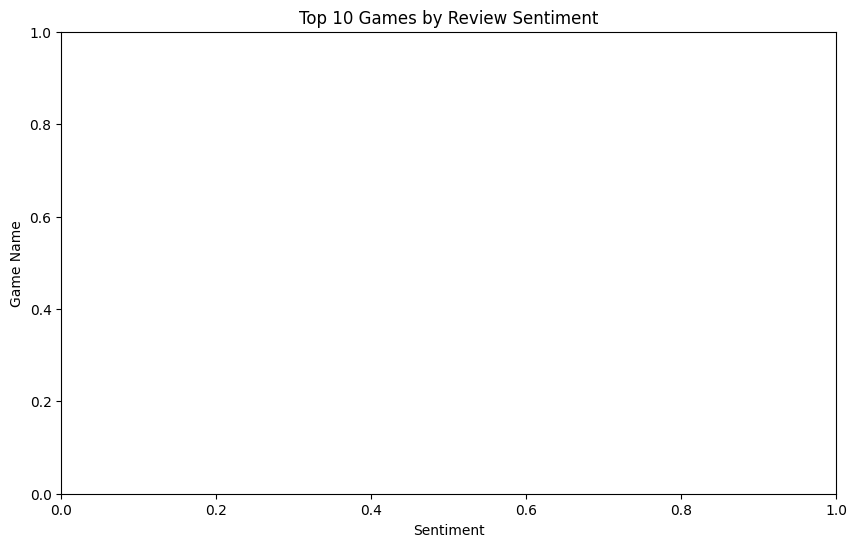

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='all_sentiment', y='name', data=top_rated, palette='viridis')
plt.title('Top 10 Games by Review Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Game Name')
plt.show()

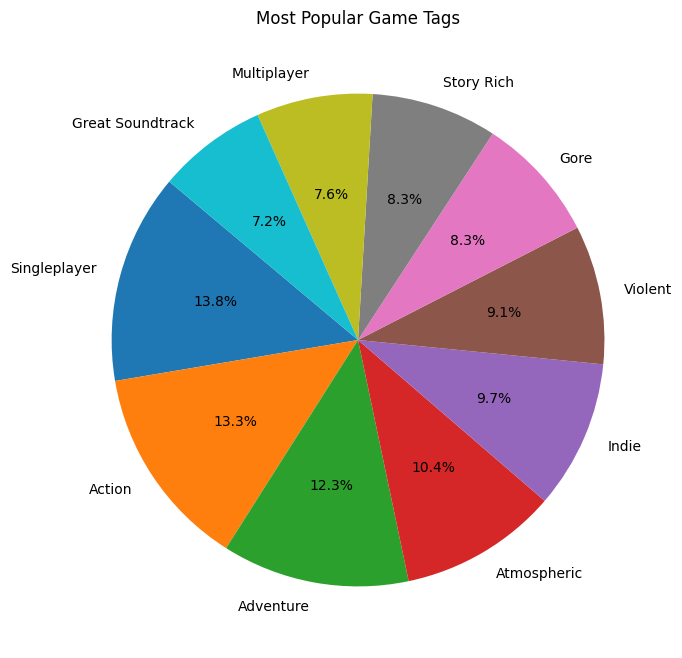

In [48]:
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Count'])
plt.figure(figsize=(8, 8))
plt.pie(top_tags['Count'], labels=top_tags['Tag'], autopct='%1.1f%%', startangle=140)
plt.title('Most Popular Game Tags')
plt.show()

In [49]:
top_rated.to_csv('top_rated_games.csv', index=False)
top_tags.to_csv('top_tags.csv', index=False)

c:\Fythonn\fyt\Main\Project_7\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 28789 (\N{CJK UNIFIED IDEOGRAPH-7075}) missing from current font.
  fig.canvas.draw()
c:\Fythonn\fyt\Main\Project_7\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 39746 (\N{CJK UNIFIED IDEOGRAPH-9B42}) missing from current font.
  fig.canvas.draw()
c:\Fythonn\fyt\Main\Project_7\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 31609 (\N{CJK UNIFIED IDEOGRAPH-7B79}) missing from current font.
  fig.canvas.draw()
c:\Fythonn\fyt\Main\Project_7\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.draw()
C:\Users\Admin\AppData\Local\Temp\ipykernel_19544\2095572173.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_count', 

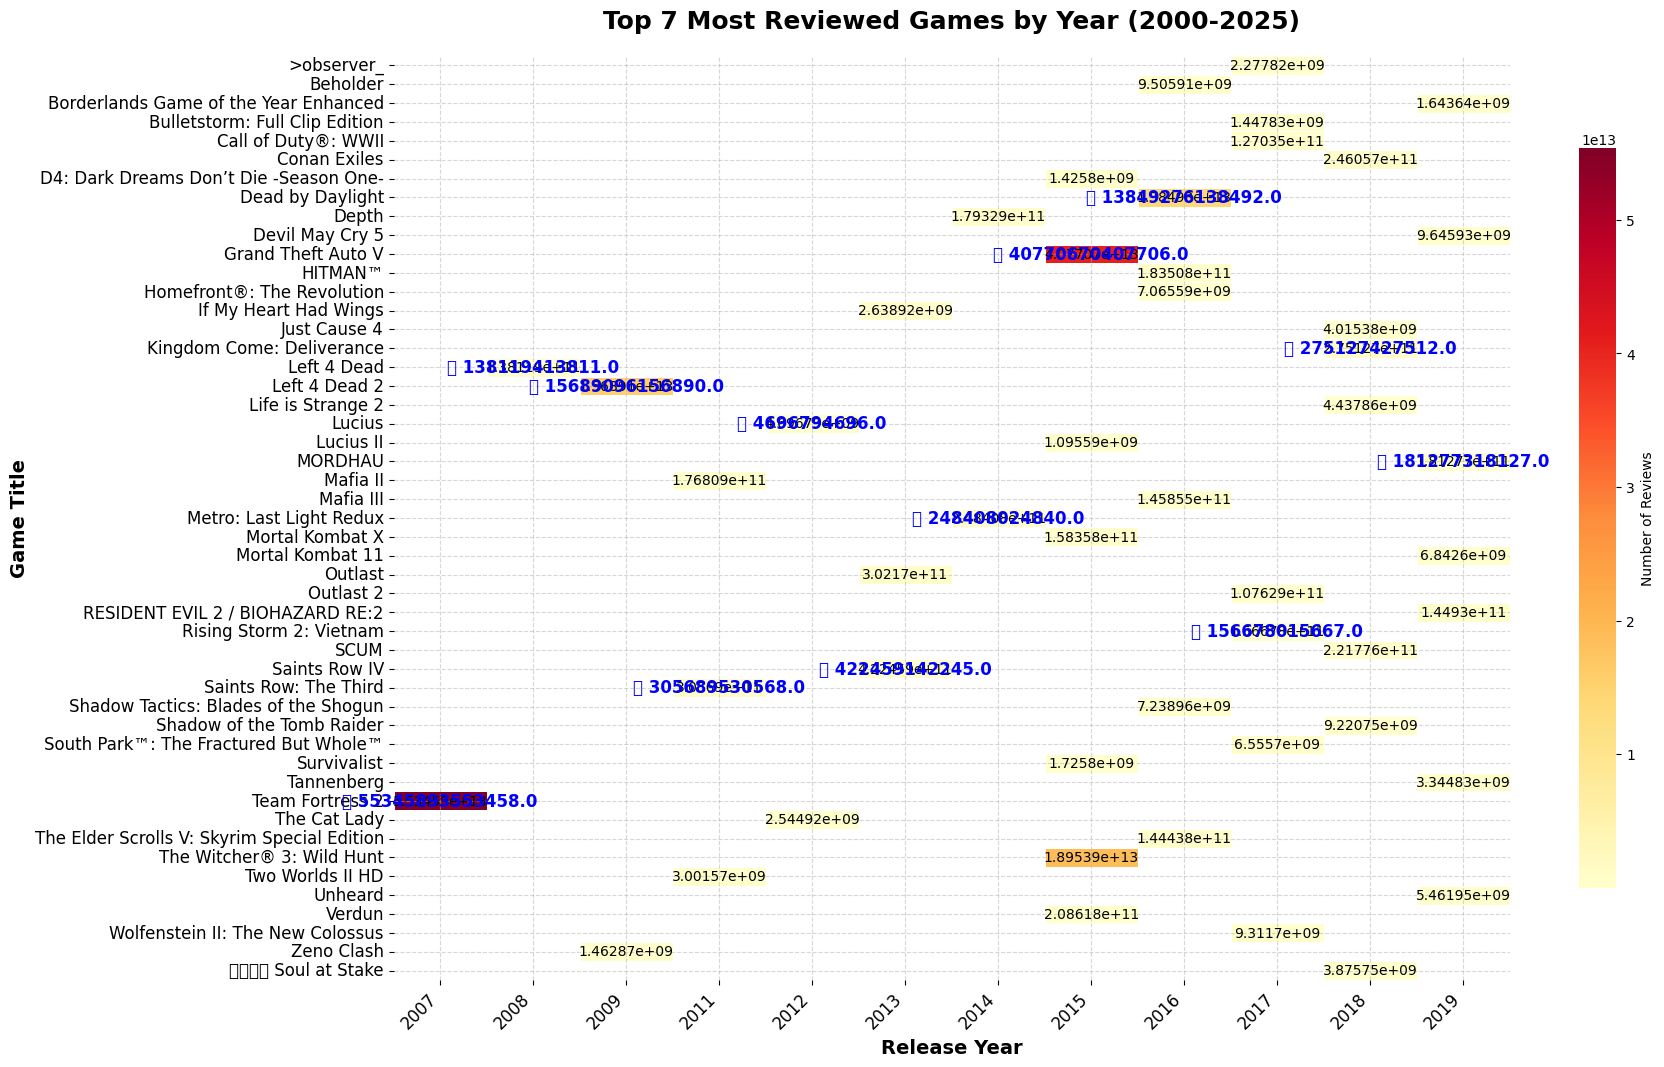

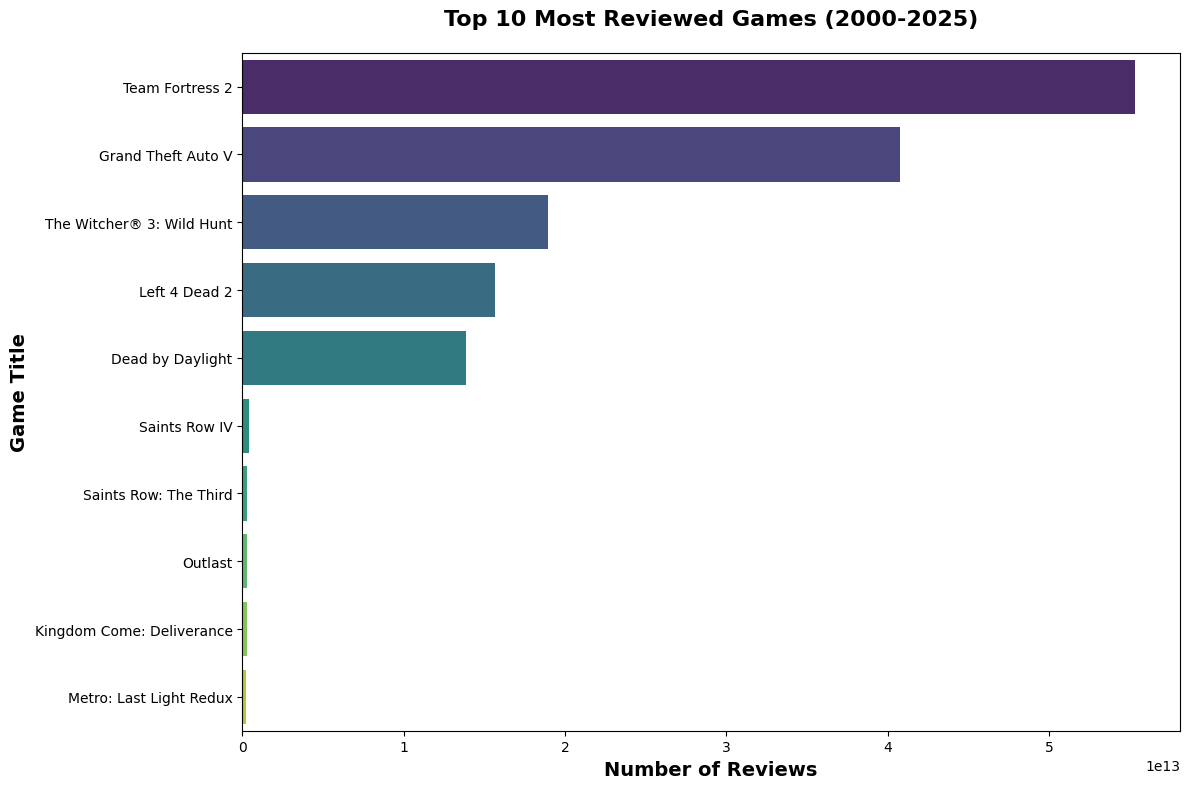

<Figure size 640x480 with 0 Axes>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Load the dataset
df = pd.read_csv('steam_games.csv')

# Clean the data
df = df.dropna()
df = df.drop_duplicates()

# Check for required columns
required_columns = ['release_date', 'all_reviews', 'name']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    print(f"Missing columns: {missing_cols}")
    exit()

# Convert release_date safely
try:
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['year'] = df['release_date'].dt.year
except KeyError:
    print("Release date conversion failed")
    exit()

# Clean and extract review counts (handling different formats like "123,456")
def extract_reviews(text):
    try:
        # Remove commas and extract numbers
        return int(''.join(filter(str.isdigit, str(text))))
    except:
        return 0

# Check if 'all_reviews' column exists
if 'all_reviews' not in df.columns:
    print("Column 'all_reviews' not found. Please check the column names.")
    exit()

# Extract review counts
df['review_count'] = df['all_reviews'].apply(extract_reviews)

# Filter out invalid years and reviews
df = df[df['year'].between(2000, 2025)]  # Adjust year range as needed
df = df[df['review_count'] > 0]

# Group and sort data
top_games = (df.groupby(['year', 'name'])['review_count'].sum()
             .reset_index()
             .sort_values(['year', 'review_count'], ascending=[True, False]))

# Get top 7 per year (instead of top 10)
top_games = top_games.groupby('year').head(7)

# Create pivot table for heatmap
pivot_data = top_games.pivot(index='name', columns='year', values='review_count')

# Create visualization
plt.figure(figsize=(18, 12))

# Use a more visually appealing color palette
cmap = sns.color_palette("YlOrRd", as_cmap=True)

# Create the heatmap
ax = sns.heatmap(pivot_data, cmap=cmap, 
                 linewidths=0.5, 
                 annot=True, fmt='g',
                 cbar_kws={'label': 'Number of Reviews', 'shrink': 0.8},
                 annot_kws={'size': 10, 'color': 'black'})  # Adjust annotation size and color

# Add a title and axis labels
plt.title('Top 7 Most Reviewed Games by Year (2000-2025)', fontsize=18, pad=20, weight='bold')
plt.xlabel('Release Year', fontsize=14, weight='bold')
plt.ylabel('Game Title', fontsize=14, weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
ax.grid(True, linestyle='--', alpha=0.5)

# Highlight the top game for each year
for year in pivot_data.columns:
    max_game = pivot_data[year].idxmax()
    max_value = pivot_data[year].max()
    if pd.notna(max_game):
        ax.text(pivot_data.columns.get_loc(year) + 0.5, 
                pivot_data.index.get_loc(max_game) + 0.5, 
                f'⭐ {max_value}', 
                ha='center', va='center', 
                fontsize=12, color='blue', weight='bold')


# Group by game name and sum review counts
top_games_bar = top_games.groupby('name')['review_count'].sum().reset_index()

# Sort by review count and get the top 10
top_games_bar = top_games_bar.sort_values('review_count', ascending=False).head(10)

# Create the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='review_count', y='name', data=top_games_bar, palette='viridis')

# Add labels and title
plt.title('Top 10 Most Reviewed Games (2000-2025)', fontsize=16, pad=20, weight='bold')
plt.xlabel('Number of Reviews', fontsize=14, weight='bold')
plt.ylabel('Game Title', fontsize=14, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()
        


# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

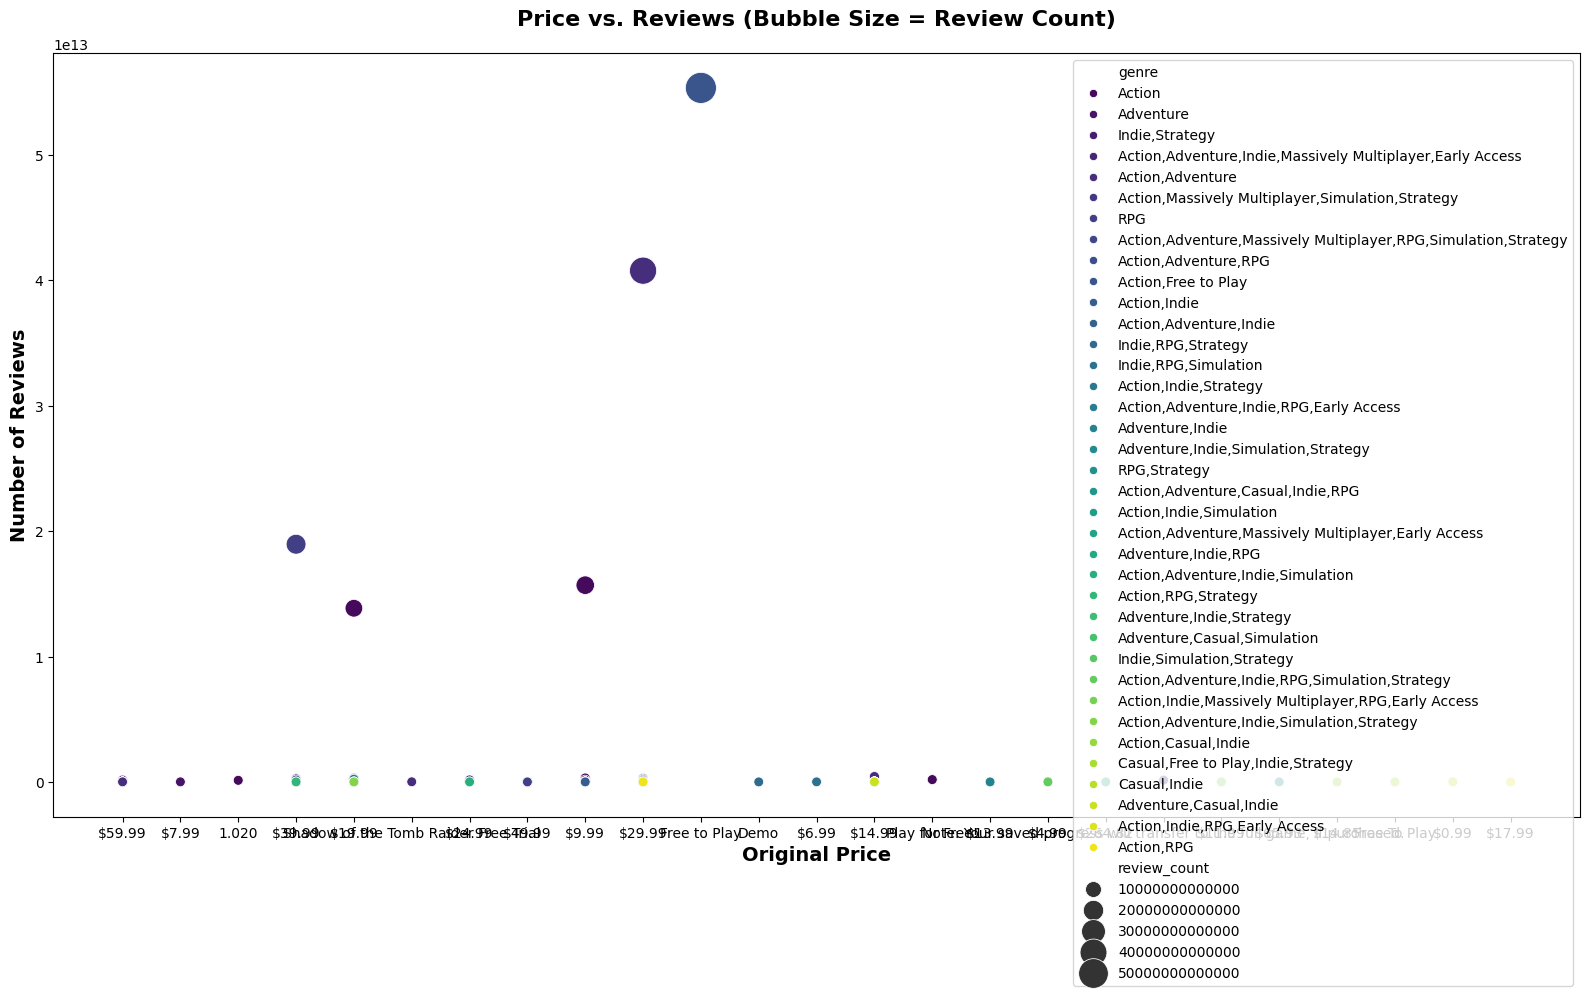

In [13]:
# Create the bubble chart
plt.figure(figsize=(16, 10))
sns.scatterplot(x='original_price', y='review_count', data=df, hue='genre', size='review_count', sizes=(50, 500), palette='viridis')

# Add labels and title
plt.title('Price vs. Reviews (Bubble Size = Review Count)', fontsize=16, pad=20, weight='bold')
plt.xlabel('Original Price', fontsize=14, weight='bold')
plt.ylabel('Number of Reviews', fontsize=14, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()

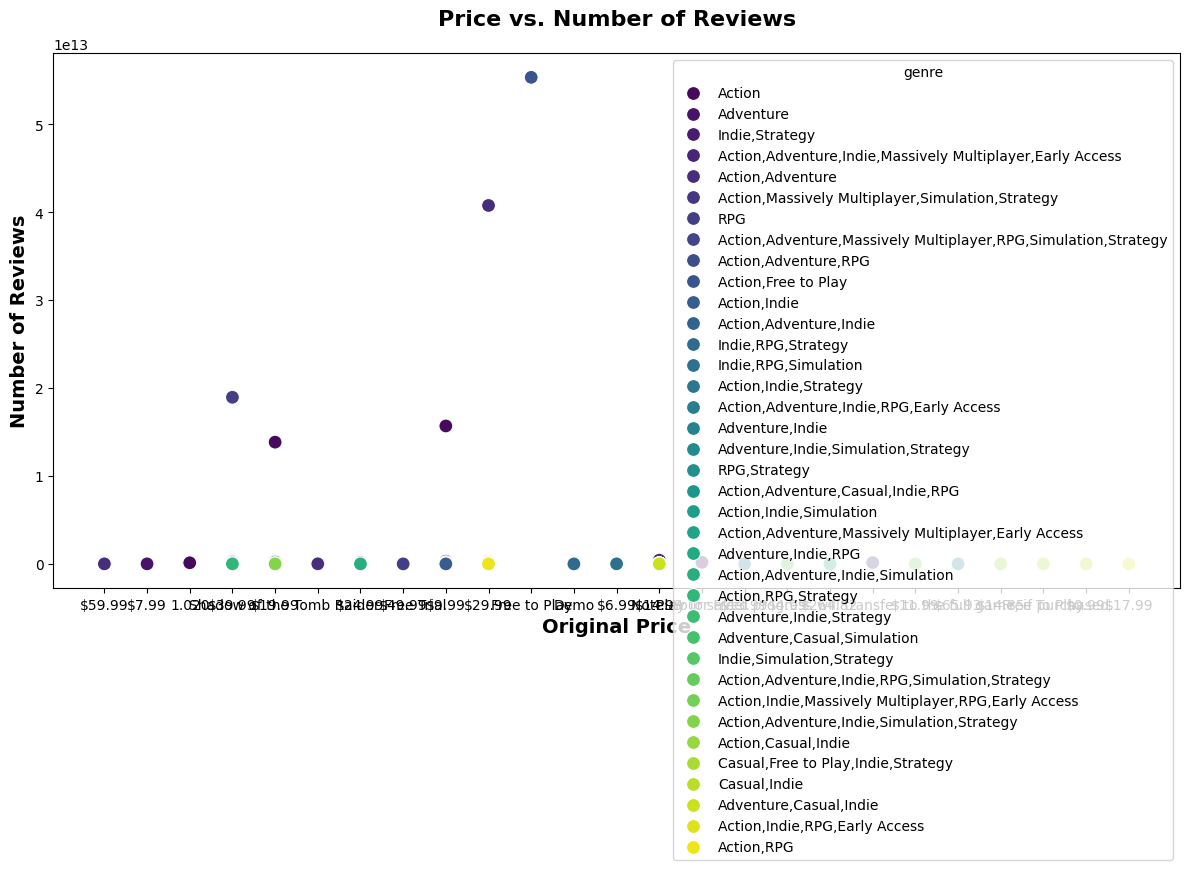

In [16]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='original_price', y='review_count', data=df, hue='genre', palette='viridis', s=100)

# Add labels and title
plt.title('Price vs. Number of Reviews', fontsize=16, pad=20, weight='bold')
plt.xlabel('Original Price', fontsize=14, weight='bold')
plt.ylabel('Number of Reviews', fontsize=14, weight='bold')

# Show the plot
plt.tight_layout()
plt.show()